# SURGEN: Exploracion de datos

## Tablas

Diagrama de tablas de datos del sistema: 
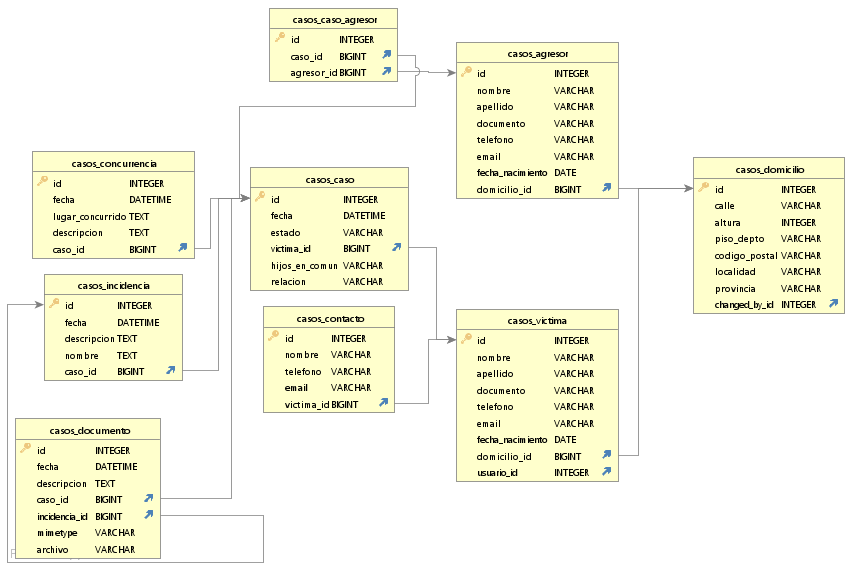

## Librerias a importar:

In [ ]:
import altair as alt
import pandas as pd
import sqlite3
import calendar
import folium
from folium.plugins import MarkerCluster
import pandas as pd
import geopy
from geopy.geocoders import Nominatim

## Exploracion de datos

### Usando la libreria de sqlite3

https://sparkbyexamples.com/pandas/pandas-read-sql-query-or-table/
https://stackoverflow.com/questions/36028759/how-to-open-and-convert-sqlite-database-to-pandas-dataframe

In [ ]:
cnx = sqlite3.connect('db.sqlite3')



victima = pd.read_sql_query("SELECT * FROM casos_victima", cnx)
agresor = pd.read_sql_query("SELECT * FROM casos_agresor", cnx)
caso_agresor = pd.read_sql_query("SELECT * FROM casos_caso_agresor", cnx)
concurrencia = pd.read_sql_query("SELECT * FROM casos_concurrencia", cnx)
contacto = pd.read_sql_query("SELECT * FROM casos_contacto", cnx)
documento = pd.read_sql_query("SELECT * FROM casos_documento", cnx)
domicilio = pd.read_sql_query("SELECT * FROM casos_domicilio", cnx)
incidencia = pd.read_sql_query("SELECT * FROM casos_incidencia", cnx)
caso = pd.read_sql_query("SELECT * FROM casos_caso", cnx)

#tablas de historial

cnx.commit()
cnx.close()
concurrencia

pandas.read_sql_query(sql, con, index_col=None, coerce_float=True, params=None, parse_dates=None, chunksize=None, dtype=None)

Returns a DataFrame corresponding to the result set of the query string. Optionally provide an index_col parameter to use one of the columns as the index, otherwise default integer index will be used.

https://colab.research.google.com/drive/13GdFHqzwh1aVjO9jeVXhFqHgWrtuT0DV#scrollTo=86g_ewG5qs-o

## Querys SQL


```
SELECT DISTINCT column_list
FROM table_list
  JOIN table ON join_condition
WHERE row_filter
ORDER BY column
LIMIT count OFFSET offset
GROUP BY column
HAVING group_filter;
```

## Indicador de concurrencias

#### Busqueda a una victima en particular

In [ ]:
cnx = sqlite3.connect('db.sqlite3')

nombre = 'Alicia'
apellido ='Perez'
nombre_agresor = 'Juan'

#Encuentro la victima a analizar: Formo tabla con id, nombre y apellido
victima = pd.read_sql_query(f"""

SELECT id, nombre, apellido 
FROM casos_victima 
WHERE nombre='{nombre}' AND apellido='{apellido}'

""", cnx)

#encuentro los casos de dicha victima: Formo tabla con id de casos,estado, y nombre y apellido del agresor
caso = pd.read_sql_query(f"""

SELECT casos_caso.id, estado, nombre, apellido FROM casos_caso 
INNER JOIN casos_caso_agresor, casos_agresor ON casos_caso.id = casos_caso_agresor.caso_id AND casos_agresor.id = casos_caso_agresor.agresor_id
WHERE victima_id = {victima.id[0]}

""", cnx)

num_caso = 0 # Esto lo se por el valor dado por la tabla anterior, se podria seleccionar en el momento o pedir de una el nombre del agresor
# cambiaria en el SELECT de concurrencias {caso_elegido.id[num_caso]}

#Si se de entrada el nombre del agresor

caso_elegido = pd.read_sql_query(f"""

SELECT casos_caso.id, estado, nombre, apellido FROM casos_caso 
INNER JOIN casos_caso_agresor, casos_agresor ON casos_caso.id = casos_caso_agresor.caso_id AND casos_agresor.id = casos_caso_agresor.agresor_id AND casos_agresor.nombre = '{nombre_agresor}'
WHERE victima_id = {victima.id[0]} 

""", cnx)

#Encuentro las concurrencias
concurrencias = pd.read_sql_query(f"SELECT * FROM casos_concurrencia WHERE caso_id = {caso_elegido.id[0]}", cnx)

cnx.commit()
cnx.close()

#victima.id[0]
#victima
concurrencias


,id,fecha,lugar_concurrido,descripcion,caso_id
0,1,2023-02-04 23:22:20.791225,Fiscalía N° 10,La victima se acercó para denunciar que el agr...,1
1,3,2023-02-23 03:32:30.842734,Comisaria N° 11,La victima se acercó para denunciar que el agr...,1


In [ ]:

concurrencias['año'] = pd.DatetimeIndex(concurrencias['fecha']).year
concurrencias['mes'] = pd.DatetimeIndex(concurrencias['fecha']).month
concurrencias['mes'] = concurrencias['mes'] .apply(lambda x: calendar.month_abbr[x])
concurrencias['dia'] = pd.DatetimeIndex(concurrencias['fecha']).day
concurrencias 

,id,fecha,lugar_concurrido,descripcion,caso_id,año,mes,dia
0,1,2023-02-04 23:22:20.791225,Fiscalía N° 10,La victima se acercó para denunciar que el agr...,1,2023,Feb,4
1,3,2023-02-23 03:32:30.842734,Comisaria N° 11,La victima se acercó para denunciar que el agr...,1,2023,Feb,23


In [ ]:

alt.Chart(concurrencias).mark_bar().encode(
    alt.X('mes'),
    alt.Y('count():Q', axis=alt.Axis(tickMinStep=1), title='N° concurrencias')
)

alt.Chart(...)

In [ ]:
meses=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
datos = concurrencias['mes'].value_counts().rename_axis('mes').reset_index(name='counts')
for mes in meses:
  if mes not in datos['mes']: 
    df2 = {'mes': mes, 'counts': 0}
   
    datos = datos.append(df2, ignore_index = True)

datos

,mes,counts
0,Feb,2


In [ ]:
d = {'mes': ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], 'counts': [0,0,0,0,0,0,0,0,0,0,0,0]}
tabla = pd.DataFrame(data=d)
datos = concurrencias['mes'].value_counts().rename_axis('mes').reset_index(name='counts')
x = 0
for x in range(12):
  if ()
  tabla.loc[2:2,'mes':'count']=mes,
#valores = concurrencias['mes'].value_counts().rename_axis('mes').reset_index(name='counts')



In [ ]:
valores
valores = concurrencias['mes'].value_counts().rename_axis('mes').reset_index(name='counts')

alt.Chart(valores).mark_line().encode(
    alt.X('mes'),
    alt.Y('counts:Q', axis=alt.Axis(tickMinStep=1), title='N° concurrencias')
)

alt.Chart(...)

## Ver Domicilios

Dados el nombre y apellido de la victima y el nombre del agresor marco en el mapa sus domicilios.

In [ ]:
cnx = sqlite3.connect('db.sqlite3')

nombre = 'Alicia'
apellido ='Perez'
nombre_agresor = 'Juan'

#Encuentro la victima a analizar: Formo tabla con id, nombre y apellido
victima = pd.read_sql_query(f"""

SELECT id, nombre, apellido, domicilio_id
FROM casos_victima 
WHERE nombre='{nombre}' AND apellido='{apellido}'

""", cnx)

domicilio = pd.read_sql_query(f"""
SELECT * 
FROM casos_domicilio
WHERE id='{victima.domicilio_id[0]}' 
""", cnx)

agresor = pd.read_sql_query(f"""

SELECT casos_caso.id, estado, nombre, apellido, domicilio_id FROM casos_caso 
INNER JOIN casos_caso_agresor, casos_agresor ON casos_caso.id = casos_caso_agresor.caso_id AND casos_agresor.id = casos_caso_agresor.agresor_id AND casos_agresor.nombre = '{nombre_agresor}'
WHERE victima_id = {victima.id[0]} 

""", cnx)

domicilio_a = pd.read_sql_query(f"""
SELECT * 
FROM casos_domicilio
WHERE id='{agresor.domicilio_id[0]}' 
""", cnx)


#direccion_v = f"""{domicilio.calle[0]} {domicilio.altura[0]}, {domicilio.localidad[0]}, Provincia de Buenos Aires, Argentina"""
#direccion_a = f"""{domicilio_a.calle[0]} {domicilio_a.altura[0]}, {domicilio_a.localidad[0]}, Provincia de Buenos Aires, Argentina"""

direccion_v = "Sarmiento 2685, Mar del Plata, Provincia de Buenos Aires, Argentina" #piso la direccion porque la de la bd es ficticia
direccion_a = "Rawson 2700, Mar del Plata, Provincia de Buenos Aires, Argentina"

geolocator = Nominatim(user_agent="ejemplo")
loc_v = geolocator.geocode(direccion_v)
loc_a = geolocator.geocode(direccion_a)


In [ ]:
boulder_coords = [loc_v.latitude, loc_v.longitude]

my_map = folium.Map(location = boulder_coords, zoom_start = 15)

#coordenadas de los domicilios a marcar
Victima = [loc_v.latitude, loc_v.longitude]
Agresor= [loc_a.latitude, loc_a.longitude]

#Agregar marcadores
folium.Marker(Victima, popup = 'Domicilio victima').add_to(my_map)
folium.Marker(Agresor, popup = 'Domicilio agresor').add_to(my_map)

#Display the map
my_map

Puedo tambien acceder a las tablas de simple_history y ver el historial de domicilios de una victima y un agresor en el mismo mapa con marcadores de diferentes formas o colores.


In [ ]:
cnx = sqlite3.connect('db.sqlite3')

nombre = 'Alicia'
apellido ='Perez'
nombre_agresor = 'Juan'

#Encuentro la victima a analizar: Formo tabla con id, nombre y apellido
victima = pd.read_sql_query(f"""

SELECT id, nombre, apellido, domicilio_id
FROM casos_victima 
WHERE nombre='{nombre}' AND apellido='{apellido}'

""", cnx)

domicilios = pd.read_sql_query(f"""
SELECT * 
FROM casos_historicaldomicilio
WHERE id='{victima.domicilio_id[0]}' 
""", cnx)

agresor = pd.read_sql_query(f"""

SELECT casos_caso.id, estado, nombre, apellido, domicilio_id FROM casos_caso 
INNER JOIN casos_caso_agresor, casos_agresor ON casos_caso.id = casos_caso_agresor.caso_id AND casos_agresor.id = casos_caso_agresor.agresor_id AND casos_agresor.nombre = '{nombre_agresor}'
WHERE victima_id = {victima.id[0]} 

""", cnx)

domicilios_a = pd.read_sql_query(f"""
SELECT * 
FROM casos_historicaldomicilio
WHERE id='{agresor.domicilio_id[0]}' 
""", cnx)

domicilios


,id,calle,altura,piso_depto,codigo_postal,localidad,provincia,history_id,history_date,history_change_reason,history_type,changed_by_id,history_user_id
0,1,Sarmiento,2685,1,7600,Mar del Plata,AR-B,1,2022-12-26 13:58:45.909053,None,+,None,2
1,1,Rawson,2700,1,7600,Mar del Plata,AR-B,3,2023-02-04 23:07:53.922438,None,~,None,3
2,1,25 de Mayo,3542,1,7600,Mar del Plata,AR-B,4,2023-02-04 23:10:54.546239,None,~,None,3


In [ ]:
direcciones_v = []
# direcciones_a = []

for i,domicilio in enumerate(domicilios.id):
   direcciones_v.append(f"""{domicilios.calle[i]} {domicilios.altura[i]}, {domicilios.localidad[1]}, Provincia de Buenos Aires, Argentina""")

coords_v=[]
geolocator = Nominatim(user_agent="ejemplo")

for direccion_v in direcciones_v: 
  loc_v = geolocator.geocode(direccion_v)
  coords_v.append([loc_v.latitude, loc_v.longitude])

boulder_coords = coords_v[0]
my_map = folium.Map(location = boulder_coords, zoom_start = 15)

#Agregar marcadores
for coord in coords_v:
  folium.RegularPolygonMarker(coord, popup = 'Domicilio victima',fill_color = '#bf00ff',number_of_sides = 5, radius = 10).add_to(my_map)

#Display the map
my_map


ver folium svg